In [1]:

import numpy as np
import cv2
import pandas as pd
from PIL import Image
import glob
from sklearn import linear_model
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt


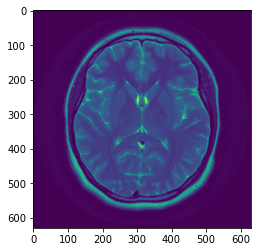

In [2]:
img = plt.imread("../1 no.jpeg")
# img=np.array(Image.open('../USTO-MB_(logo).jpg').convert('L'))
plt.imshow(img)


In [67]:
def histogram(img, nb_int):
    vector = np.vectorize(np.int_)
    n = img.shape[0]
    m = img.shape[1]
    x = 256 / nb_int
    hist_val = np.zeros(nb_int)
    for i in range(n):
        for j in range(m):
            k = img[i, j] / x
            hist_val[vector(k)] += 1
    return hist_val

<BarContainer object of 8 artists>

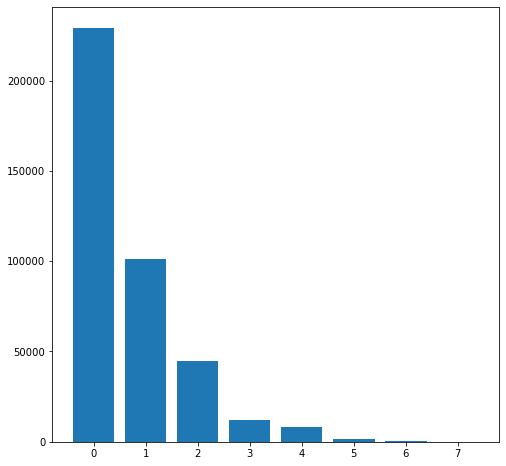

In [4]:
hist=histogram(img, 8)
plt.figure(figsize=(8, 8))
plt.bar(range(hist.shape[0]), hist)

In [5]:
def split(img,nbxsplit,nbysplit):#this is for number of splitting in line and column
          xpart=img.shape[0]//nbxsplit#number of part or region in line shape of image
          ypart=img.shape[1]//nbysplit#number of part in column shape of image
          arr=[] #empty arr for storage
          for i in range(1,img.shape[0],xpart):#boucle stepping by part of x and end until she arrived the last part ,in the there will be lost of of little size beacause sometimes thelast part we can't devide it into flly part
                    for j in range(1,img.shape[1],ypart):
                               
                               arr.append(img[i:i+xpart,j:j+ypart])
          # a=np.array(arr)
          return arr

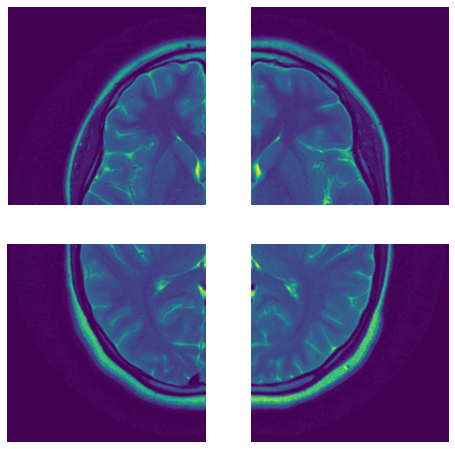

In [6]:
nbxsplit=2
nbysplit=2
spl_images=split(img,nbxsplit,nbysplit)
plt.figure(figsize=(8, 8))
for i in range(nbysplit*nbxsplit):
    plt.subplot(2, 2, i + 1)
    plt.axis('off')
    plt.imshow(spl_images[i])

In [7]:
def coul2grey(img):
    if len(img.shape) > 2:
        im = np.zeros((img.shape[0], img.shape[1]))
        im[:, :] = (img[:, :, 0]+img[:, :, 1]+img[:, :, 2])/3
        return im
    else:
        return img


In [8]:
size=(128,128)
X_data_no=[]
X_data_yes=[]
nbysplit=2
nbxsplit=2
no_images = glob.glob("./Dataset/brain_tumor_dataset/no/"+'*')
yes_images = glob.glob("./Dataset/brain_tumor_dataset/yes/"+'*')

for myFile in no_images:
    image_no = cv2.imread (myFile)
    spl_images_no = split(image_no, nbxsplit, nbysplit)
    for i in range(nbysplit*nbxsplit):
        X_data_no.append(cv2.resize(cv2.cvtColor(cv2.detailEnhance(spl_images_no[i], sigma_s=81, sigma_r=0.15)
            , cv2.COLOR_BGR2GRAY), size, interpolation=cv2.INTER_AREA))
        

for myFile in yes_images:
    image_yes = cv2.imread(myFile)  
    spl_images_yes=(split(image_yes, nbxsplit, nbysplit))
    for i in range(nbysplit*nbxsplit):  
        X_data_yes.append(cv2.resize(cv2.cvtColor(cv2.detailEnhance(spl_images_yes[i], sigma_s=81, sigma_r=0.15), cv2.COLOR_BGR2GRAY),
                                        size, interpolation=cv2.INTER_AREA))


In [9]:
histo_no = []
for i in range(len(X_data_no)):
    histo_no.append(histogram(X_data_no[i], 10))

In [10]:
histo_yes=[]
for i in range(len(X_data_yes)):
    histo_yes.append(histogram(X_data_yes[i], 10))

In [11]:
df_no = pd.DataFrame(histo_no)
df_no.to_csv('histo_no.csv', index=False)
print(df_no)


           0       1       2       3       4       5       6       7       8  \
0    11434.0  1537.0  1115.0   712.0   425.0   324.0   215.0   168.0   170.0   
1    11648.0  1554.0  1082.0   639.0   363.0   272.0   218.0   171.0   180.0   
2    11280.0  1845.0  1055.0   695.0   358.0   284.0   194.0   152.0   144.0   
3    11183.0  1902.0  1202.0   622.0   377.0   269.0   170.0   136.0   164.0   
4     3627.0   632.0   789.0  1381.0  1931.0  2123.0  1833.0  1495.0  1108.0   
..       ...     ...     ...     ...     ...     ...     ...     ...     ...   
387  13832.0   803.0   417.0   235.0   173.0   192.0   181.0   148.0   134.0   
388  10505.0   564.0   591.0   680.0   782.0   992.0  1337.0   478.0   132.0   
389  10917.0   521.0   634.0   655.0   635.0   785.0  1004.0   695.0   191.0   
390   8458.0   476.0   597.0   904.0  1081.0  1344.0  1928.0   708.0   205.0   
391   8215.0   673.0   731.0   869.0   917.0  1295.0  1977.0   827.0   186.0   

          9  
0     284.0  
1     257.0

In [12]:
df_yes = pd.DataFrame(histo_yes)
df_yes.to_csv('histo_yes.csv', index=False)
print(df_yes)


          0       1       2       3       4       5       6       7      8  \
0    5173.0   273.0   514.0   760.0  1142.0  2336.0  2636.0  1802.0  956.0   
1    7342.0   807.0   990.0  1601.0  1104.0   830.0   734.0   730.0  755.0   
2    4423.0   492.0  1516.0  2901.0  2625.0  1308.0   496.0   494.0  763.0   
3    4669.0   495.0   616.0  2044.0  4479.0  2523.0   373.0   175.0  187.0   
4    6570.0   826.0  1629.0  2977.0  2176.0   740.0   294.0   226.0  252.0   
..      ...     ...     ...     ...     ...     ...     ...     ...    ...   
615  8649.0  1157.0  2885.0  2234.0   761.0   234.0    81.0    71.0   84.0   
616  4754.0  1137.0  2486.0  3869.0  2089.0   210.0   135.0   123.0  157.0   
617  5808.0  1932.0  2165.0  2199.0  1319.0   435.0   259.0   257.0  275.0   
618  3773.0  1057.0  2630.0  3980.0  1971.0   535.0   294.0   282.0  281.0   
619  5169.0  1504.0  2362.0  2592.0  1406.0   622.0   361.0   315.0  291.0   

          9  
0     792.0  
1    1491.0  
2    1366.0  
3     8

array([[<AxesSubplot:title={'center':'0'}>,
        <AxesSubplot:title={'center':'1'}>,
        <AxesSubplot:title={'center':'2'}>],
       [<AxesSubplot:title={'center':'3'}>,
        <AxesSubplot:title={'center':'4'}>,
        <AxesSubplot:title={'center':'5'}>],
       [<AxesSubplot:title={'center':'6'}>,
        <AxesSubplot:title={'center':'7'}>,
        <AxesSubplot:title={'center':'8'}>],
       [<AxesSubplot:title={'center':'9'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

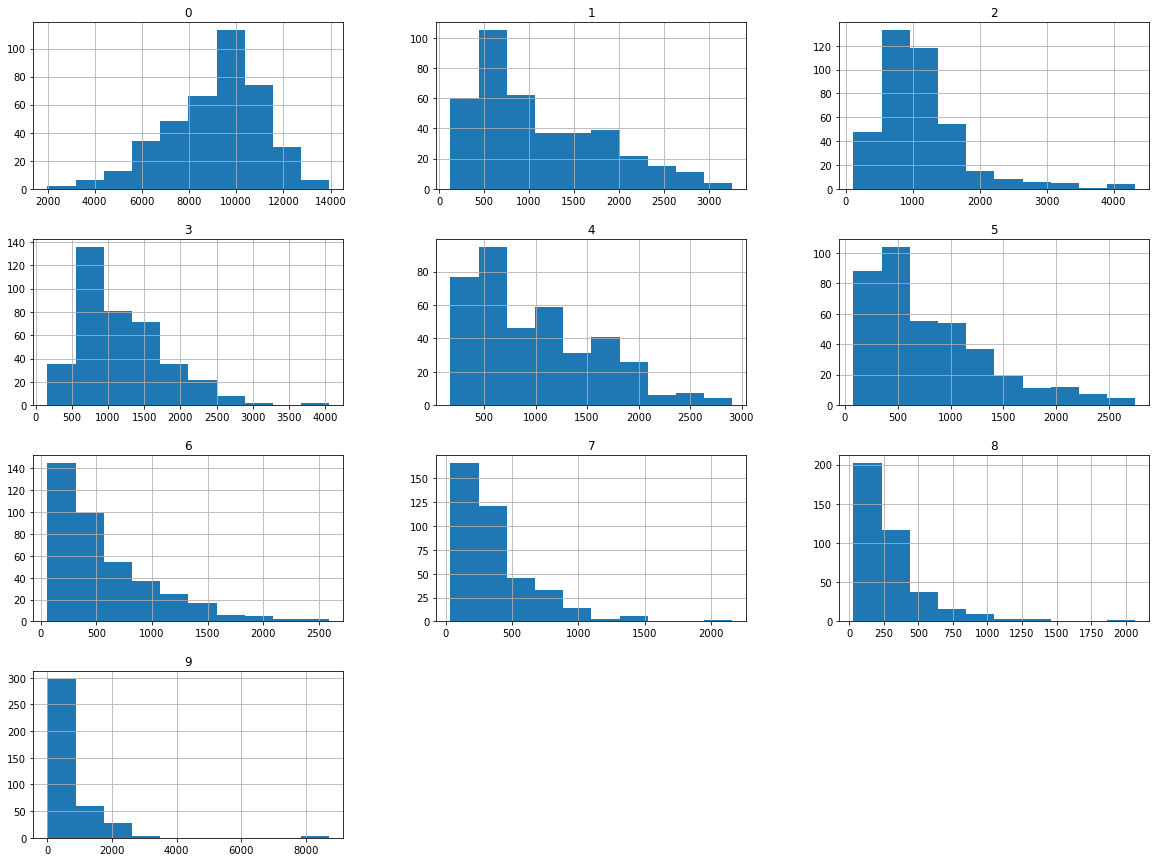

In [13]:
df_no.hist(figsize=(20,15))

array([[<AxesSubplot:title={'center':'0'}>,
        <AxesSubplot:title={'center':'1'}>,
        <AxesSubplot:title={'center':'2'}>],
       [<AxesSubplot:title={'center':'3'}>,
        <AxesSubplot:title={'center':'4'}>,
        <AxesSubplot:title={'center':'5'}>],
       [<AxesSubplot:title={'center':'6'}>,
        <AxesSubplot:title={'center':'7'}>,
        <AxesSubplot:title={'center':'8'}>],
       [<AxesSubplot:title={'center':'9'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

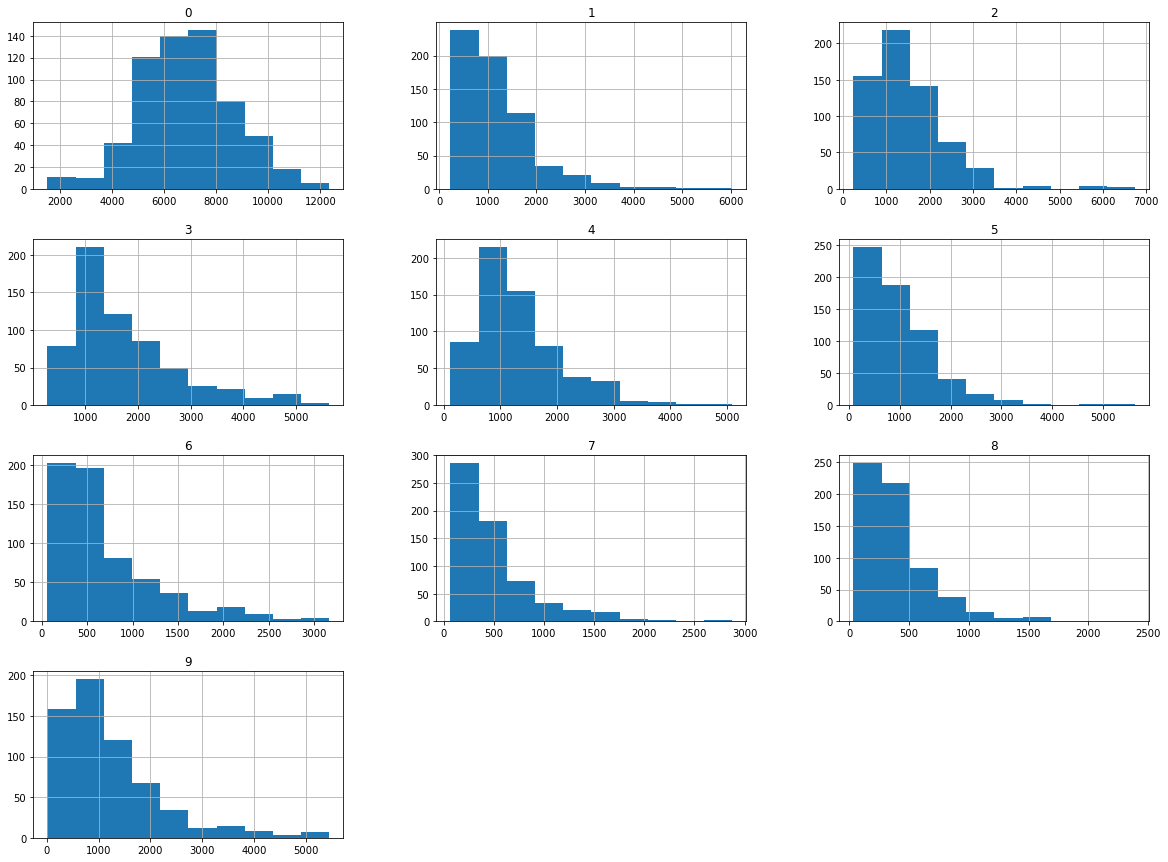

In [14]:
df_yes.hist(figsize=(20,15))

https://builtin.com/data-science/train-test-split

In [15]:
# boucle pour les column de csv file
# csv_input = pd.read_csv(output_file)  # reading my csv file
# for row in csv_input:
#     csv_input[value] = csv_input['3']
#     print(row)
# #boucle pour les ligne de csv file
# with open(output_file, newline='') as csvfile:
#     spamreader =reader(csvfile, delimiter=' ', quotechar='|')
#     for row in spamreader:
#         print(row)
def add_column_in_csv(output_file, value):
    # read file csv wich we want to add column
    csv_input = pd.read_csv(output_file)
    # ad acoumn class and assign to it for a value parameter
    csv_input['class'] = float(value)
    # save the new file output int csv
    csv_input.to_csv('output'+output_file, index=False)
    df_new = pd.read_csv('output'+output_file)  # read the new file generated
    print(df_new)
    features = ['0', '1', '2', '3']
    x = df_new.loc[:, features]
    y = df_new.loc[:, ['class']]
    return x, y


In [16]:
x_no,y_no=add_column_in_csv('histo_no.csv','0')

           0       1       2       3       4       5       6       7       8  \
0    11434.0  1537.0  1115.0   712.0   425.0   324.0   215.0   168.0   170.0   
1    11648.0  1554.0  1082.0   639.0   363.0   272.0   218.0   171.0   180.0   
2    11280.0  1845.0  1055.0   695.0   358.0   284.0   194.0   152.0   144.0   
3    11183.0  1902.0  1202.0   622.0   377.0   269.0   170.0   136.0   164.0   
4     3627.0   632.0   789.0  1381.0  1931.0  2123.0  1833.0  1495.0  1108.0   
..       ...     ...     ...     ...     ...     ...     ...     ...     ...   
387  13832.0   803.0   417.0   235.0   173.0   192.0   181.0   148.0   134.0   
388  10505.0   564.0   591.0   680.0   782.0   992.0  1337.0   478.0   132.0   
389  10917.0   521.0   634.0   655.0   635.0   785.0  1004.0   695.0   191.0   
390   8458.0   476.0   597.0   904.0  1081.0  1344.0  1928.0   708.0   205.0   
391   8215.0   673.0   731.0   869.0   917.0  1295.0  1977.0   827.0   186.0   

          9  class  
0     284.0    0.0

In [17]:
x_yes,y_yes=add_column_in_csv('histo_yes.csv','1')

          0       1       2       3       4       5       6       7      8  \
0    5173.0   273.0   514.0   760.0  1142.0  2336.0  2636.0  1802.0  956.0   
1    7342.0   807.0   990.0  1601.0  1104.0   830.0   734.0   730.0  755.0   
2    4423.0   492.0  1516.0  2901.0  2625.0  1308.0   496.0   494.0  763.0   
3    4669.0   495.0   616.0  2044.0  4479.0  2523.0   373.0   175.0  187.0   
4    6570.0   826.0  1629.0  2977.0  2176.0   740.0   294.0   226.0  252.0   
..      ...     ...     ...     ...     ...     ...     ...     ...    ...   
615  8649.0  1157.0  2885.0  2234.0   761.0   234.0    81.0    71.0   84.0   
616  4754.0  1137.0  2486.0  3869.0  2089.0   210.0   135.0   123.0  157.0   
617  5808.0  1932.0  2165.0  2199.0  1319.0   435.0   259.0   257.0  275.0   
618  3773.0  1057.0  2630.0  3980.0  1971.0   535.0   294.0   282.0  281.0   
619  5169.0  1504.0  2362.0  2592.0  1406.0   622.0   361.0   315.0  291.0   

          9  class  
0     792.0    1.0  
1    1491.0    1.0  


In [18]:
x_training_yes_and_no = pd.concat([x_no, x_yes])
y_training_yes_and_no = pd.concat([y_no, y_yes])

In [19]:
X_train, X_test, y_train, y_test = train_test_split(
    x_training_yes_and_no, y_training_yes_and_no, random_state=0, train_size=.8)

In [20]:
from sklearn.ensemble import RandomForestClassifier

In [21]:
reg = RandomForestClassifier(random_state=0)

In [22]:
# reg.fit(X_train, y_train, batch_size=32, epochs=100)
reg.fit(X_train, y_train)

/tmp/ipykernel_30922/2489135419.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  reg.fit(X_train, y_train)


RandomForestClassifier(random_state=0)

In [23]:
reg.predict(X_test[0:10])

array([1., 1., 0., 1., 1., 1., 0., 1., 1., 0.])

For the multiple predictions above, notice how many times some of the predictions are repeated. If you are wondering why, I encourage you to check out the code below, which will start by looking at a single observation/house and then proceed to examine how the model makes its prediction.

In [24]:
X_test.head(1)

,0,1,2,3
330,6872.0,423.0,614.0,1074.0


The code below shows how to make a prediction for that single observation.

In [25]:
reg.predict(X_test.iloc[0].values.reshape(1,-1))

/home/hichem/.local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1.])

In [26]:
score = reg.score(X_test, y_test)
print(score*100,'%')

85.71428571428571 %


Phase2


In [ ]:

# X_train, X_test,
def siift(X_train):
    histed_train = X_train.copy()
    sift = cv2.SIFT_create()
    for i in X_train:
        keypoints_1, descriptors_1 = sift.detectAndCompute(i, None)
        histed_train[i].append(keypoints_1)
    return histed_train


In [181]:
def SIFT(img, Filter=False):
    if Filter:
        img = cv2.GaussianBlur(img, (5, 5), cv2.BORDER_DEFAULT)
    sift = cv2.SIFT_create()
    keypoints_sift, descriptors = sift.detectAndCompute(img, None)
    # print("Features : ",len(keypoints_sift))
    imgKP = cv2.drawKeypoints(img, keypoints_sift, None)
    # return imgKP
    return imgKP


In [196]:
size = (128, 128)

X_data_no_sift = []
X_data_yes_sift = []
nbysplit = 2
nbxsplit = 2
no_images = glob.glob("./Dataset/brain_tumor_dataset/no/"+'*')
yes_images = glob.glob("./Dataset/brain_tumor_dataset/yes/"+'*')

for myFile in no_images:
    image_no = cv2.imread(myFile)
    spl_images_no = split(image_no, nbxsplit, nbysplit)
    for i in range(nbysplit*nbxsplit):
        X_data_no=(cv2.resize(cv2.cvtColor(cv2.detailEnhance(
            spl_images_no[i], sigma_s=81, sigma_r=0.15), cv2.COLOR_BGR2GRAY), size, interpolation=cv2.INTER_AREA))
        nbr_features = SIFT(X_data_no, Filter=False)
        X_data_no_sift.append(nbr_features)
for myFile in yes_images:
    image_yes = cv2.imread(myFile)
    spl_images_yes = (split(image_yes, nbxsplit, nbysplit))
    for i in range(nbysplit*nbxsplit):
        X_data_yes=(cv2.resize(cv2.cvtColor(cv2.detailEnhance(spl_images_yes[i], sigma_s=15, sigma_r=0.15), cv2.COLOR_BGR2GRAY),
                                     size, interpolation=cv2.INTER_AREA))
        nbr_features = SIFT(X_data_yes, Filter=True)
        X_data_yes_sift.append(nbr_features)


In [197]:
histo_no_sift = []
for i in range(len(X_data_no_sift)):
    histo_no_sift.append(histogram(X_data_no_sift[i], 10))


In [198]:
histo_yes_sift = []
for i in range(len(X_data_yes_sift)):
    histo_yes_sift.append(histogram(X_data_yes_sift[i], 10))


In [199]:
df_no_sift = pd.DataFrame(histo_no_sift)
df_no_sift.to_csv('histo_no_sift.csv', index=False)
print(df_no_sift)


           0       1       2       3       4       5       6       7       8  \
0    10875.0  1891.0  1712.0  1373.0  1123.0  1116.0   857.0   759.0   479.0   
1    11293.0  1846.0  1584.0  1356.0  1115.0   992.0   799.0   684.0   430.0   
2    10759.0  2107.0  1688.0  1448.0  1138.0  1040.0   748.0   612.0   351.0   
3    10579.0  2380.0  1939.0  1557.0  1297.0  1140.0   871.0   626.0   449.0   
4     3395.0  2185.0  2857.0  3657.0  4068.0  4471.0  3886.0  3292.0  2109.0   
..       ...     ...     ...     ...     ...     ...     ...     ...     ...   
387  13266.0  1255.0   991.0   879.0   704.0   825.0   714.0   559.0   367.0   
388  10197.0   938.0  1151.0  1416.0  1640.0  1833.0  2023.0  1218.0   652.0   
389  10685.0  1057.0  1166.0  1346.0  1422.0  1612.0  1823.0  1231.0   580.0   
390   8214.0  1147.0  1596.0  1975.0  2032.0  2293.0  2600.0  1279.0   780.0   
391   7976.0   999.0  1397.0  1713.0  1779.0  2139.0  2737.0  1766.0   895.0   

          9  
0     271.0  
1     249.0

In [200]:
df_yes_sift = pd.DataFrame(histo_yes_sift)
df_yes_sift.to_csv('histo_yes_sift.csv', index=False)
print(df_yes_sift)


          0       1       2       3       4       5       6       7       8  \
0    4802.0   934.0  1192.0  1726.0  2282.0  4021.0  3874.0  1951.0   958.0   
1    6110.0  1488.0  2018.0  2955.0  2276.0  1893.0  1813.0  1417.0  1026.0   
2    3806.0   844.0  1581.0  4148.0  3786.0  1547.0  1258.0  1328.0   911.0   
3    4016.0   983.0  1064.0  3830.0  5549.0  1352.0   678.0   439.0   507.0   
4    5176.0  1596.0  2852.0  5083.0  2121.0  1123.0   656.0   471.0   445.0   
..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
615  7465.0  1806.0  5637.0  1758.0   773.0   488.0   435.0   279.0   114.0   
616  3619.0  1523.0  3581.0  5464.0  1051.0   650.0   839.0   620.0   450.0   
617  3946.0  2479.0  3419.0  3545.0  1331.0  1164.0   939.0   970.0   452.0   
618  2658.0  1406.0  3728.0  5785.0  1154.0   938.0   824.0   751.0   549.0   
619  3462.0  2492.0  3382.0  3844.0  1072.0  1014.0   694.0   840.0   438.0   

         9  
0    127.0  
1    318.0  
2    397.0  

In [201]:
x_no_sift, y_no_sift = add_column_in_csv('histo_yes_sift.csv', '0')


          0       1       2       3       4       5       6       7       8  \
0    4802.0   934.0  1192.0  1726.0  2282.0  4021.0  3874.0  1951.0   958.0   
1    6110.0  1488.0  2018.0  2955.0  2276.0  1893.0  1813.0  1417.0  1026.0   
2    3806.0   844.0  1581.0  4148.0  3786.0  1547.0  1258.0  1328.0   911.0   
3    4016.0   983.0  1064.0  3830.0  5549.0  1352.0   678.0   439.0   507.0   
4    5176.0  1596.0  2852.0  5083.0  2121.0  1123.0   656.0   471.0   445.0   
..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
615  7465.0  1806.0  5637.0  1758.0   773.0   488.0   435.0   279.0   114.0   
616  3619.0  1523.0  3581.0  5464.0  1051.0   650.0   839.0   620.0   450.0   
617  3946.0  2479.0  3419.0  3545.0  1331.0  1164.0   939.0   970.0   452.0   
618  2658.0  1406.0  3728.0  5785.0  1154.0   938.0   824.0   751.0   549.0   
619  3462.0  2492.0  3382.0  3844.0  1072.0  1014.0   694.0   840.0   438.0   

         9  class  
0    127.0    0.0  
1    318.0 

In [202]:
x_yes_sift,y_yes_sift=add_column_in_csv('histo_no_sift.csv','1')

           0       1       2       3       4       5       6       7       8  \
0    10875.0  1891.0  1712.0  1373.0  1123.0  1116.0   857.0   759.0   479.0   
1    11293.0  1846.0  1584.0  1356.0  1115.0   992.0   799.0   684.0   430.0   
2    10759.0  2107.0  1688.0  1448.0  1138.0  1040.0   748.0   612.0   351.0   
3    10579.0  2380.0  1939.0  1557.0  1297.0  1140.0   871.0   626.0   449.0   
4     3395.0  2185.0  2857.0  3657.0  4068.0  4471.0  3886.0  3292.0  2109.0   
..       ...     ...     ...     ...     ...     ...     ...     ...     ...   
387  13266.0  1255.0   991.0   879.0   704.0   825.0   714.0   559.0   367.0   
388  10197.0   938.0  1151.0  1416.0  1640.0  1833.0  2023.0  1218.0   652.0   
389  10685.0  1057.0  1166.0  1346.0  1422.0  1612.0  1823.0  1231.0   580.0   
390   8214.0  1147.0  1596.0  1975.0  2032.0  2293.0  2600.0  1279.0   780.0   
391   7976.0   999.0  1397.0  1713.0  1779.0  2139.0  2737.0  1766.0   895.0   

          9  class  
0     271.0    1.0

array([[<AxesSubplot:title={'center':'0'}>,
        <AxesSubplot:title={'center':'1'}>,
        <AxesSubplot:title={'center':'2'}>],
       [<AxesSubplot:title={'center':'3'}>,
        <AxesSubplot:title={'center':'4'}>,
        <AxesSubplot:title={'center':'5'}>],
       [<AxesSubplot:title={'center':'6'}>,
        <AxesSubplot:title={'center':'7'}>,
        <AxesSubplot:title={'center':'8'}>],
       [<AxesSubplot:title={'center':'9'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

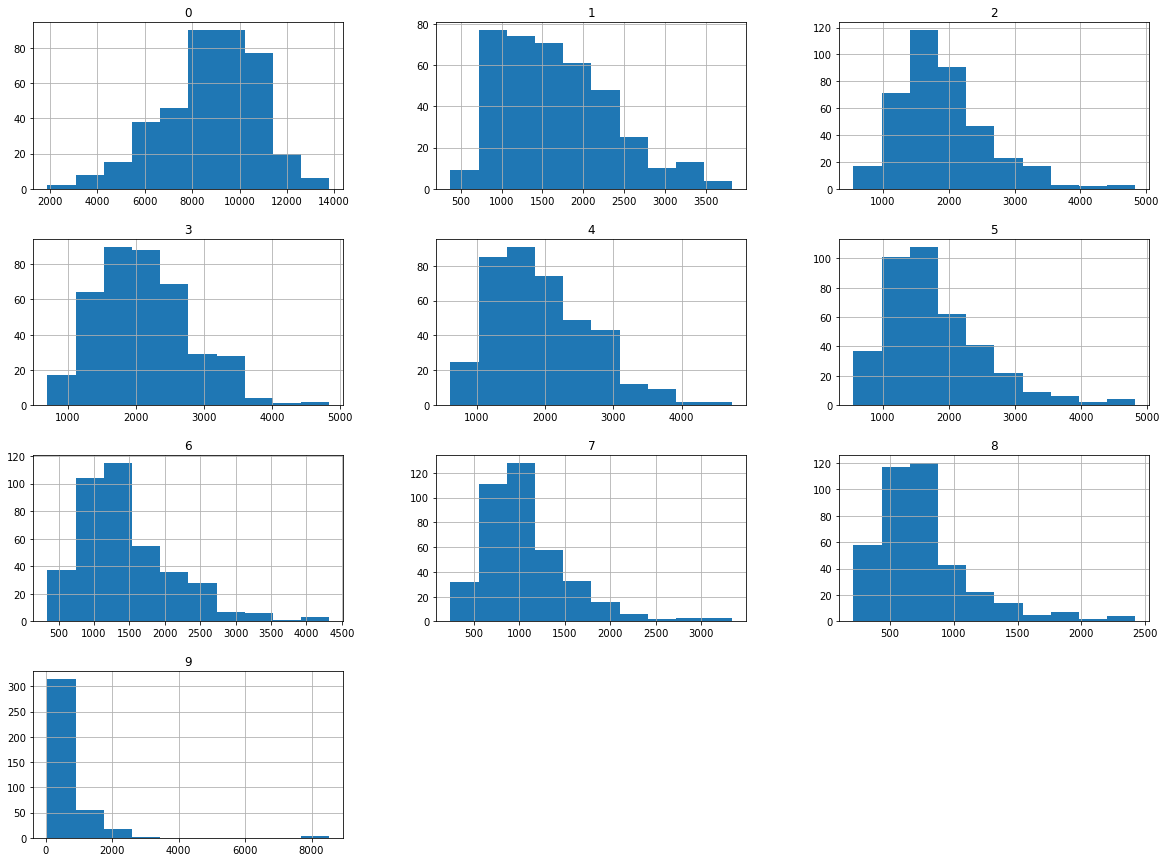

In [203]:
df_no_sift.hist(figsize=(20,15))

array([[<AxesSubplot:title={'center':'0'}>,
        <AxesSubplot:title={'center':'1'}>,
        <AxesSubplot:title={'center':'2'}>],
       [<AxesSubplot:title={'center':'3'}>,
        <AxesSubplot:title={'center':'4'}>,
        <AxesSubplot:title={'center':'5'}>],
       [<AxesSubplot:title={'center':'6'}>,
        <AxesSubplot:title={'center':'7'}>,
        <AxesSubplot:title={'center':'8'}>],
       [<AxesSubplot:title={'center':'9'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

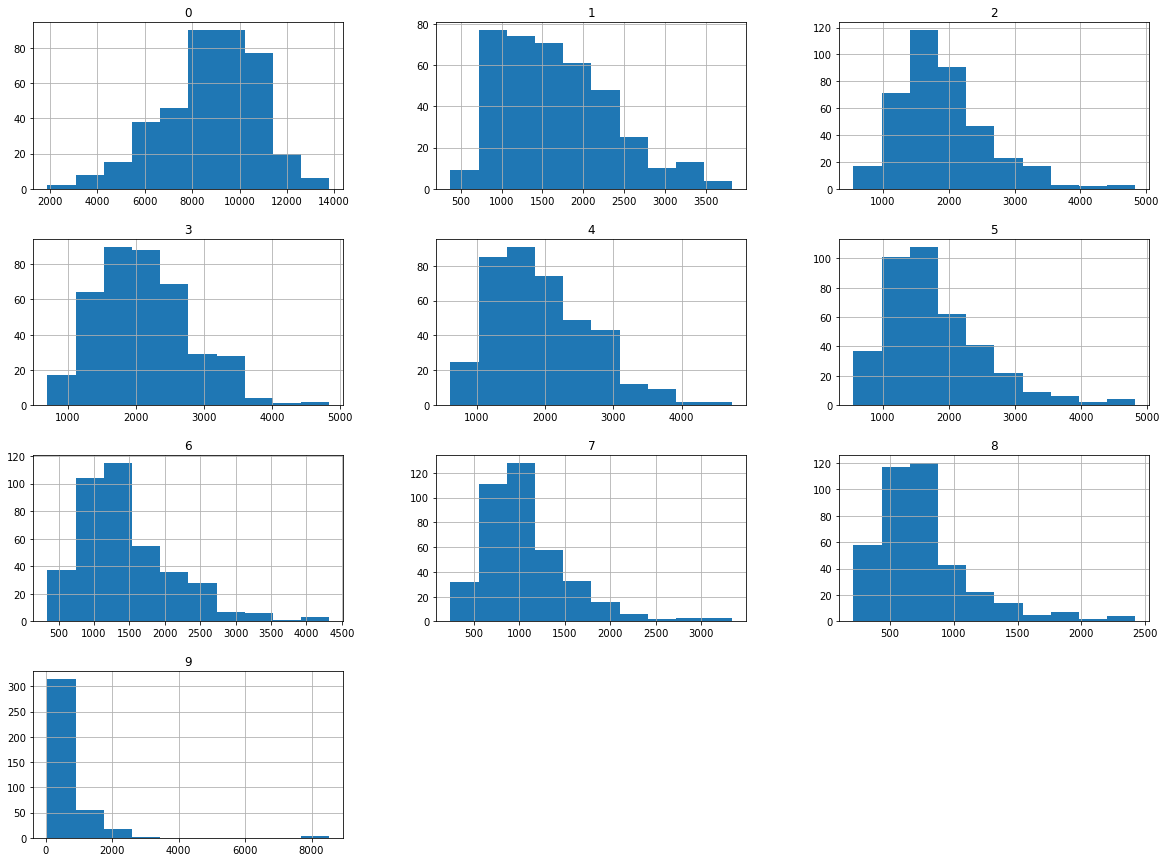

In [204]:
df_no_sift.hist(figsize=(20,15))

In [205]:
x_training_yes_and_no_sift = pd.concat([x_no_sift, x_yes_sift])
y_training_yes_and_no_sift = pd.concat([y_no_sift, y_yes_sift])


In [206]:

X_train_sift, X_test_sift, y_train_sift, y_test_sift = train_test_split(
    x_training_yes_and_no_sift, y_training_yes_and_no_sift, random_state=0, train_size=.8)


In [207]:
reg = RandomForestClassifier(random_state=0)


In [208]:
# reg.fit(X_train, y_train, batch_size=32, epochs=100)
reg.fit(X_train_sift, y_train_sift)


/tmp/ipykernel_30922/1109701701.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  reg.fit(X_train_sift, y_train_sift)


RandomForestClassifier(random_state=0)

In [209]:
score = reg.score(X_test_sift, y_test_sift)
print(score*100,'%')

89.16256157635468 %
